<a href="https://colab.research.google.com/github/Jaswanth-03/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# basic information about the dataset

In [ ]:
import pandas as pd
import numpy as np

# Generate sample dataset
data = pd.DataFrame({
    'student_id': range(1, 11),
    'gender': ['Male', 'Female'] * 5,
    'age': np.random.randint(18, 25, 10),
    'math_score': np.random.randint(50, 100, 10),
    'english_score': np.random.randint(50, 100, 10),
    'science_score': np.random.randint(50, 100, 10)
})

# Save the dataset to a CSV file
data.to_csv("student_performance.csv", index=False)

# Load the dataset
data = pd.read_csv("student_performance.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Summary statistics of numerical variables
print("\nSummary statistics of numerical variables:")
print(data.describe())

# Check for unique values in categorical variables
print("\nUnique values in categorical variables:")
print(data["gender"].unique())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


First few rows of the dataset:
   student_id  gender  age  math_score  english_score  science_score
0           1    Male   19          90             77             72
1           2  Female   21          96             62             82
2           3    Male   19          63             58             76
3           4  Female   21          61             54             91
4           5    Male   18          88             62             64

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     10 non-null     int64 
 1   gender         10 non-null     object
 2   age            10 non-null     int64 
 3   math_score     10 non-null     int64 
 4   english_score  10 non-null     int64 
 5   science_score  10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes
None

Summary sta

# Visualizing patterns

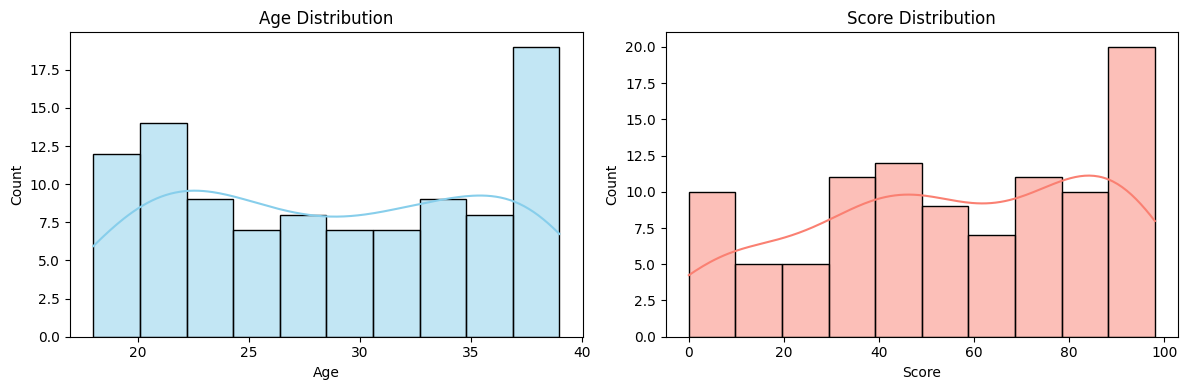

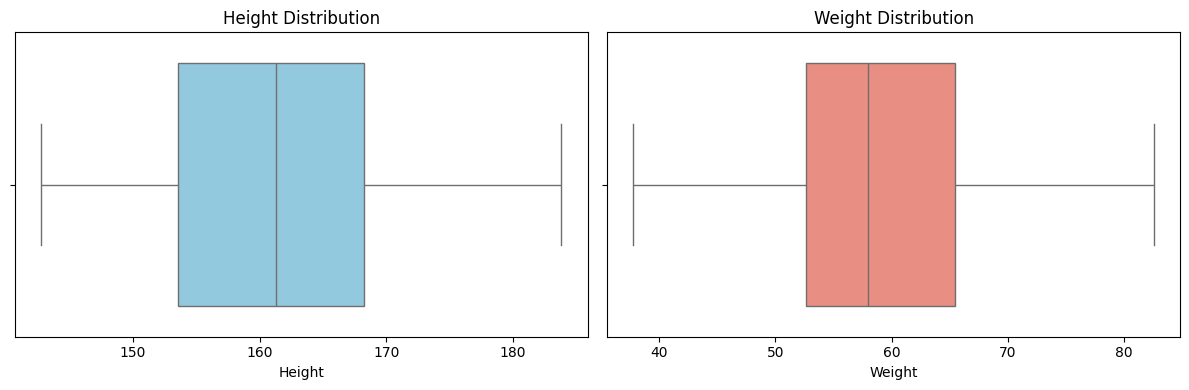

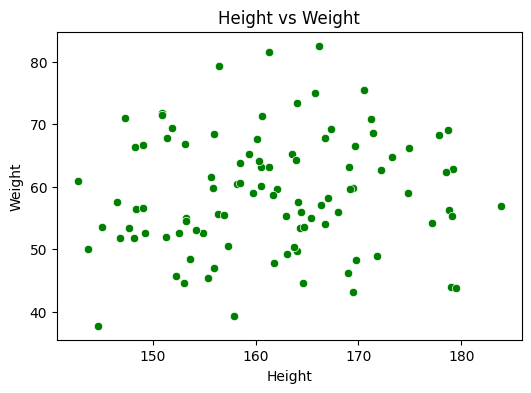

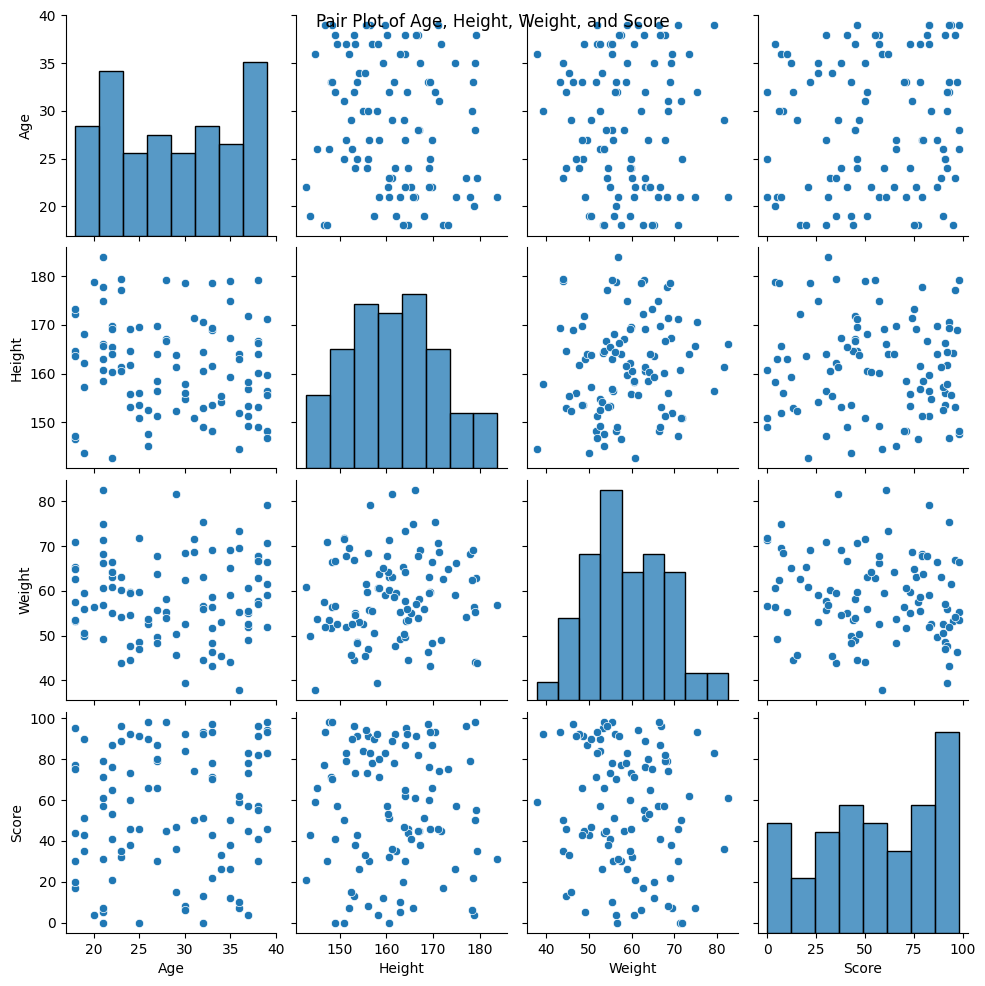

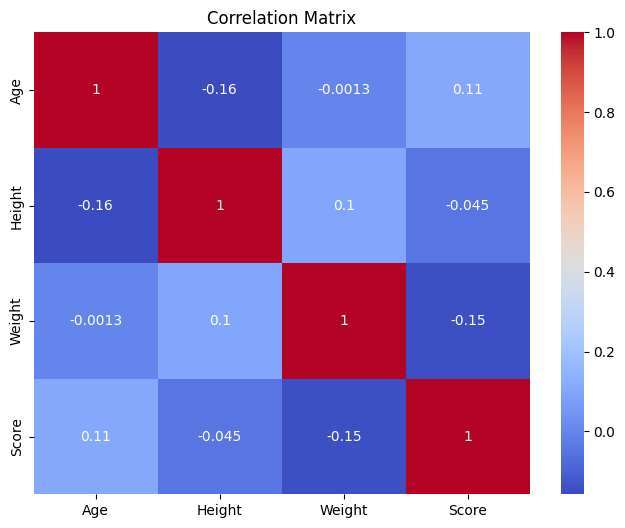

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Age': np.random.randint(18, 40, 100),
    'Height': np.random.normal(160, 10, 100),
    'Weight': np.random.normal(60, 10, 100),
    'Score': np.random.randint(0, 100, 100)
})

# Visualize patterns using histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Score'], bins=10, kde=True, color='salmon')
plt.title('Score Distribution')
plt.tight_layout()
plt.show()

# Visualize patterns using box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='Height', data=data, color='skyblue')
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Weight', data=data, color='salmon')
plt.title('Weight Distribution')
plt.tight_layout()
plt.show()

# Visualize patterns using scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Height', y='Weight', data=data, color='green')
plt.title('Height vs Weight')
plt.show()

# Visualize patterns using pair plot
sns.pairplot(data[['Age', 'Height', 'Weight', 'Score']])
plt.suptitle('Pair Plot of Age, Height, Weight, and Score')
plt.show()

# Visualize patterns using correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# outliers using box plots

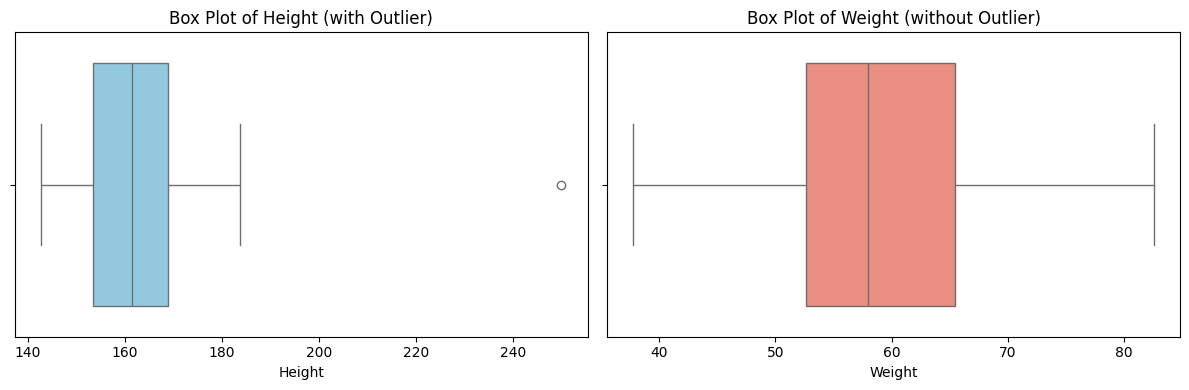

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Age': np.random.randint(18, 40, 100),
    'Height': np.random.normal(160, 10, 100),
    'Weight': np.random.normal(60, 10, 100),
    'Score': np.random.randint(0, 100, 100)
})

# Introduce outliers
data.loc[0, 'Height'] = 250  # Introduce an outlier in Height

# Visualize outliers using box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='Height', data=data, color='skyblue')
plt.title('Box Plot of Height (with Outlier)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Weight', data=data, color='salmon')
plt.title('Box Plot of Weight (without Outlier)')
plt.tight_layout()
plt.show()


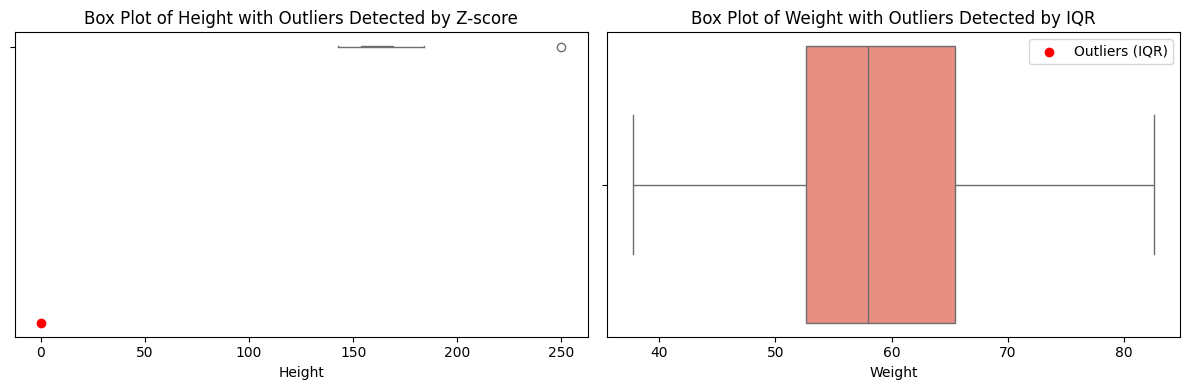

Outliers detected by Z-score:
   Age  Height     Weight  Score
0   30   250.0  52.552452     84

Outliers detected by IQR:
Empty DataFrame
Columns: [Age, Height, Weight, Score]
Index: []


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Age': np.random.randint(18, 40, 100),
    'Height': np.random.normal(160, 10, 100),
    'Weight': np.random.normal(60, 10, 100),
    'Score': np.random.randint(0, 100, 100)
})

# Introduce outliers
data.loc[0, 'Height'] = 250  # Introduce an outlier in Height

# Detect outliers using z-scores
z_scores = (data['Height'] - data['Height'].mean()) / data['Height'].std()
outliers_zscore = data[np.abs(z_scores) > 3]  # Threshold for extreme outliers

# Detect outliers using IQR
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[(data['Weight'] < Q1 - 1.5 * IQR) | (data['Weight'] > Q3 + 1.5 * IQR)]

# Visualize outliers using box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='Height', data=data, color='skyblue')
plt.scatter(outliers_zscore.index, outliers_zscore['Height'], color='red', label='Outliers (Z-score)')
plt.title('Box Plot of Height with Outliers Detected by Z-score')

plt.subplot(1, 2, 2)
sns.boxplot(x='Weight', data=data, color='salmon')
plt.scatter(outliers_iqr.index, outliers_iqr['Weight'], color='red', label='Outliers (IQR)')
plt.title('Box Plot of Weight with Outliers Detected by IQR')
plt.legend()
plt.tight_layout()
plt.show()

# Determine if outliers are legitimate or due to data errors
print("Outliers detected by Z-score:")
print(outliers_zscore)

print("\nOutliers detected by IQR:")
print(outliers_iqr)


# Handle missing values

In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 7, 8, np.nan, 10],
    'C': ['a', 'b', np.nan, 'd', 'e']
})

# Display the dataset
print("Sample dataset with missing values:")
print(data)

# Identify missing values
missing_values = data.isnull()
print("\nMissing values in the dataset:")
print(missing_values)

# Understand patterns of missing values
missing_patterns = missing_values.sum()
print("\nPatterns of missing values:")
print(missing_patterns)

# Handle missing values using imputation (filling missing values with mean)
data_imputed = data.fillna(data.mean())
print("\nDataset after imputation (filling missing values with mean):")
print(data_imputed)

# Handle missing values using deletion (removing rows with missing values)
data_dropped = data.dropna()
print("\nDataset after deletion (removing rows with missing values):")
print(data_dropped)


Sample dataset with missing values:
     A     B    C
0  1.0   NaN    a
1  2.0   7.0    b
2  NaN   8.0  NaN
3  4.0   NaN    d
4  5.0  10.0    e

Missing values in the dataset:
       A      B      C
0  False   True  False
1  False  False  False
2   True  False   True
3  False   True  False
4  False  False  False

Patterns of missing values:
A    1
B    2
C    1
dtype: int64

Dataset after imputation (filling missing values with mean):
     A          B    C
0  1.0   8.333333    a
1  2.0   7.000000    b
2  3.0   8.000000  NaN
3  4.0   8.333333    d
4  5.0  10.000000    e

Dataset after deletion (removing rows with missing values):
     A     B  C
1  2.0   7.0  b
4  5.0  10.0  e


<ipython-input-1-c7a3d11a9acf>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed = data.fillna(data.mean())


# Identify wrong data or wrong format data

In [ ]:
import pandas as pd

# Create a sample dataset with wrong data/wrong format data
data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, '30s', 35, '40', 45],  # '30s' and '40' are wrong format data
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Income': ['$50,000', '$60,000', '$70,000', '$80,000', '90,000']  # '90,000' is wrong data
})

# Display the dataset
print("Sample dataset with wrong data/wrong format data:")
print(data)

# Identify wrong data or wrong format data in the 'Age' column
wrong_age_data = data[~data['Age'].astype(str).str.isdigit()]
print("\nRows with wrong data/wrong format data in the 'Age' column:")
print(wrong_age_data)

# Convert 'Age' column to numeric and coerce errors to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Identify wrong data in the 'Income' column
wrong_income_data = data[~data['Income'].str.replace('$', '').str.replace(',', '').str.isdigit()]
print("\nRows with wrong data in the 'Income' column:")
print(wrong_income_data)

# Remove dollar sign and comma from 'Income' column and convert to numeric
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

# Display the cleaned dataset
print("\nCleaned dataset:")
print(data)


Sample dataset with wrong data/wrong format data:
   ID     Name  Age  Gender   Income
0   1    Alice   25  Female  $50,000
1   2      Bob  30s    Male  $60,000
2   3  Charlie   35    Male  $70,000
3   4    David   40    Male  $80,000
4   5      Eve   45  Female   90,000

Rows with wrong data/wrong format data in the 'Age' column:
   ID Name  Age Gender   Income
1   2  Bob  30s   Male  $60,000

Rows with wrong data in the 'Income' column:
Empty DataFrame
Columns: [ID, Name, Age, Gender, Income]
Index: []

Cleaned dataset:
   ID     Name   Age  Gender   Income
0   1    Alice  25.0  Female  50000.0
1   2      Bob   NaN    Male  60000.0
2   3  Charlie  35.0    Male  70000.0
3   4    David  40.0    Male  80000.0
4   5      Eve  45.0  Female  90000.0


<ipython-input-2-88de9e510208>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wrong_income_data = data[~data['Income'].str.replace('$', '').str.replace(',', '').str.isdigit()]
<ipython-input-2-88de9e510208>:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)


# checking for enough data for the intended analysis

In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset with limited data
data = pd.DataFrame({
    'Feature_1': np.random.rand(100),
    'Feature_2': np.random.rand(100),
    'Target': np.random.randint(0, 2, 100)  # Binary classification target variable
})

# Display the shape of the dataset
print("Shape of the dataset:")
print(data.shape)

# Assess whether the dataset contains enough data for the intended analysis
num_samples = len(data)
num_features = data.shape[1] - 1  # Exclude the target variable
num_classes = len(data['Target'].unique())
print("\nnum_features:",num_features)
print("\nnum_classes:",num_classes)
print("\nnum_samples:",num_samples)

# Calculate factors such as data complexity, variability, and desired statistical power
complexity_factor = num_features * num_classes
variability_factor = num_samples / (num_samples - num_features)
statistical_power = 0.8  # Desired level of statistical power
print("\nvariability_factor:",variability_factor)
print("\ncomplexity_factor:",complexity_factor)

# Check if the dataset contains enough data based on the factors
if num_samples >= complexity_factor * variability_factor * statistical_power:
    print("\nThe dataset contains enough data for the intended analysis.")
else:
    print("\nThe dataset may not contain enough data for the intended analysis. Strategies such as data augmentation or collecting additional data may be necessary.")


Shape of the dataset:
(100, 3)

num_features: 2

num_classes: 2

num_samples: 100

variability_factor: 1.0204081632653061

complexity_factor: 4

The dataset contains enough data for the intended analysis.


# log transformation

In [ ]:
import numpy as np

# Generate a sample dataset with skewed distribution
np.random.seed(0)
data = np.random.exponential(scale=1, size=1000)  # Exponential distribution with high skewness

# Apply log transformation to the data
transformed_data = np.log(data)

# Display original and transformed data
print("Original data:")
print(data[:5])
print("\nTransformed data (after applying log transformation):")
print(transformed_data[:5])


Original data:
[0.79587451 1.25593076 0.92322315 0.78720115 0.55104849]

Transformed data (after applying log transformation):
[-0.22831376  0.22787694 -0.07988431 -0.23927147 -0.59593247]


Original data:
[0.79587451 1.25593076 0.92322315 0.78720115 0.55104849]

Transformed data (after applying log transformation):
[-0.22831376  0.22787694 -0.07988431 -0.23927147 -0.59593247]


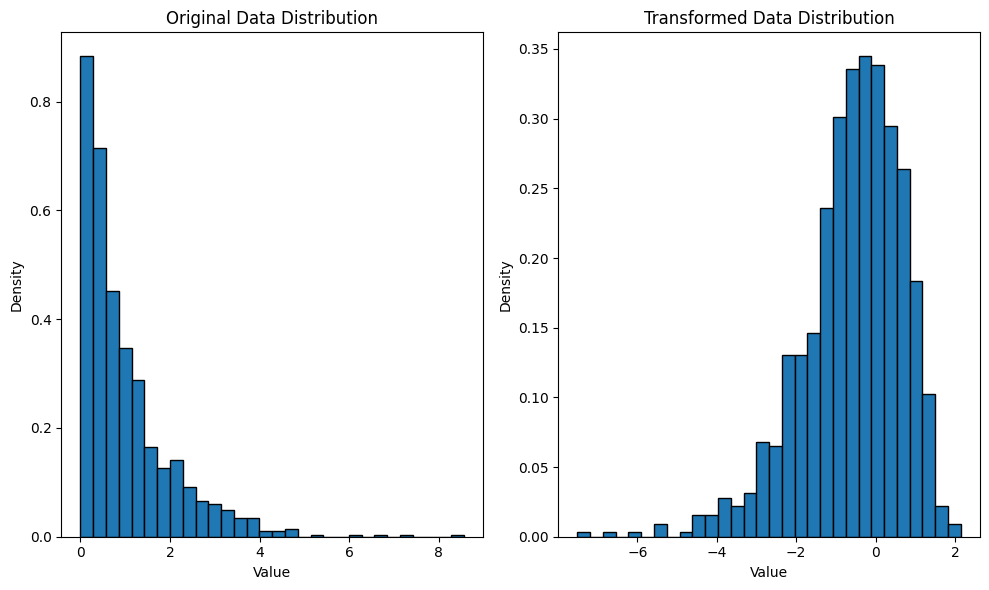

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset with skewed distribution
np.random.seed(0)
data = np.random.exponential(scale=1, size=1000) # Exponential distribution with high skewness

# Apply log transformation to the data
transformed_data = np.log(data)

# Display original and transformed data
print("Original data:")
print(data[:5])
print("\nTransformed data (after applying log transformation):")
print(transformed_data[:5])

# Plot the original data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot the transformed data
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, density=True, edgecolor='black')
plt.title('Transformed Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Winsorization

In [ ]:
import pandas as pd

# Create a sample dataset with outliers
data = pd.DataFrame({
    'Feature': [100, 200, 300, 400, 500, 1000, 1500, 2000]  # Contains outliers at the upper end
})

# Calculate the 95th percentile of the feature
percentile_95 = data['Feature'].quantile(0.95)

# Apply Winsorization to cap extreme values at the 95th percentile
winsorized_data = data.clip(upper=percentile_95, axis=1)

# Display original and winsorized data
print("Original data:")
print(data)
print("\nWinsorized data:")
print(winsorized_data)


Original data:
   Feature
0      100
1      200
2      300
3      400
4      500
5     1000
6     1500
7     2000

Winsorized data:
   Feature
0      100
1      200
2      300
3      400
4      500
5     1000
6     1500
7     1825


# binning

In [ ]:
import pandas as pd

# Create a sample dataset with outliers
data = pd.DataFrame({
    'Age': [22, 25, 30, 33, 55, 75, 80, 85, 90]  # Contains outliers at the upper end
})

# Apply binning to group ages into intervals
bins = [0, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Display original data with age groups
print("Original data with age groups:")
print(data)


Original data with age groups:
   Age    Age_group
0   22        Young
1   25        Young
2   30        Young
3   33  Middle-aged
4   55  Middle-aged
5   75       Senior
6   80       Senior
7   85       Senior
8   90       Senior


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate a sample dataset with outliers
X, y = make_regression(n_samples=100, n_features=1, noise=5, bias=10, random_state=0)
y[0] = 5000  # Introduce an outlier in the target variable

# Train a Random Forest regressor
model = RandomForestRegressor()
model.fit(X, y)

# Display model performance metrics
print("Model R-squared score:", model.score(X, y))


Model R-squared score: 0.723608498876945


# imputation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Create a sample dataset with missing values
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 7, 8, np.nan, 10],
    'C': ['a', 'b', np.nan, 'd', 'e']
})

# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns
non_numeric_columns = data.select_dtypes(exclude=np.number).columns

# Perform imputation using mean strategy for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
imputed_numeric_data = pd.DataFrame(imputer_numeric.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Perform imputation using most frequent strategy for non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
imputed_non_numeric_data = pd.DataFrame(imputer_non_numeric.fit_transform(data[non_numeric_columns]), columns=non_numeric_columns)

# Concatenate imputed numeric and non-numeric data
imputed_data = pd.concat([imputed_numeric_data, imputed_non_numeric_data], axis=1)

# Display the original and imputed data
print("Original data:")
print(data)
print("\nImputed data:")
print(imputed_data)


Original data:
     A     B    C
0  1.0   NaN    a
1  2.0   7.0    b
2  NaN   8.0  NaN
3  4.0   NaN    d
4  5.0  10.0    e

Imputed data:
     A          B  C
0  1.0   8.333333  a
1  2.0   7.000000  b
2  3.0   8.000000  a
3  4.0   8.333333  d
4  5.0  10.000000  e


In [ ]:
# Delete rows with missing values
data_without_missing_rows = data.dropna()

# Delete columns with missing values
data_without_missing_columns = data.dropna(axis=1)

# Display the original data and data after deletion
print("Original data:")
print(data)
print("\nData after deletion of rows with missing values:")
print(data_without_missing_rows)
print("\nData after deletion of columns with missing values:")
print(data_without_missing_columns)


Original data:
     A     B    C
0  1.0   NaN    a
1  2.0   7.0    b
2  NaN   8.0  NaN
3  4.0   NaN    d
4  5.0  10.0    e

Data after deletion of rows with missing values:
     A     B  C
1  2.0   7.0  b
4  5.0  10.0  e

Data after deletion of columns with missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Create a sample dataset with missing values
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 7, 8, np.nan, 10],
    'C': ['a', 'b', np.nan, 'd', 'e']
})

# Encode categorical variables
encoder = OrdinalEncoder()
data_encoded = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)
print("data_encoded:")
print(data_encoded)

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=2)
imputed_data_encoded = imputer.fit_transform(data_encoded)
print("imputed_data_encoded:")
print(imputed_data_encoded)


# Decode the imputed data
imputed_data = pd.DataFrame(encoder.inverse_transform(imputed_data_encoded), columns=data.columns)

# Display the original and imputed data
print("Original data:")
print(data)
print("\nImputed data using KNN imputation:")
print(imputed_data)


data_encoded:
     A    B    C
0  0.0  NaN  0.0
1  1.0  0.0  1.0
2  NaN  1.0  NaN
3  2.0  NaN  2.0
4  3.0  2.0  3.0
imputed_data_encoded:
[[0. 1. 0.]
 [1. 0. 1.]
 [2. 1. 2.]
 [2. 1. 2.]
 [3. 2. 3.]]
Original data:
     A     B    C
0  1.0   NaN    a
1  2.0   7.0    b
2  NaN   8.0  NaN
3  4.0   NaN    d
4  5.0  10.0    e

Imputed data using KNN imputation:
     A     B  C
0  1.0   8.0  a
1  2.0   7.0  b
2  4.0   8.0  d
3  4.0   8.0  d
4  5.0  10.0  e


# handling wrong data

In [ ]:
import pandas as pd

# Create a sample dataset with potential wrong data entries
data = pd.DataFrame({
    'Age': [25, 30, 150, 33, 55, 75, 80, 85, 90]  # Contains unrealistic age values
})

# Define data validation rule for age (age should be between 0 and 120)
def validate_age(age):
    if age < 0 or age > 120:
        return np.nan  # Replace invalid age with NaN
    else:
        return age

# Apply data validation rule to correct wrong data entries
data['Age'] = data['Age'].apply(validate_age)

# Display the corrected data
print("Corrected data:")
print(data)


Corrected data:
    Age
0  25.0
1  30.0
2   NaN
3  33.0
4  55.0
5  75.0
6  80.0
7  85.0
8  90.0


In [ ]:
# Manually inspecting and correcting wrong data entries
data.loc[data['Age'] > 120, 'Age'] = np.nan  # Replace ages greater than 120 with NaN

# Display the corrected data
print("Corrected data:")
print(data)



Corrected data:
    Age
0  25.0
1  30.0
2   NaN
3  33.0
4  55.0
5  75.0
6  80.0
7  85.0
8  90.0


# Isolation Forest for outlier detection

In [ ]:
from sklearn.ensemble import IsolationForest

# Remove rows with missing values
data_cleaned = data.dropna()

# Apply Isolation Forest for outlier detection
clf = IsolationForest(contamination=0.1)  # Assuming 10% of data are outliers
outliers = clf.fit_predict(data_cleaned[['Age']])
data_cleaned['Outlier'] = outliers

# Filter out non-outliers
data_filtered = data_cleaned[data_cleaned['Outlier'] == 1].drop(columns=['Outlier'])

# Display the cleaned data
print("Cleaned data after removing outliers:")
print(data_filtered)


Cleaned data after removing outliers:
    Age
0  25.0
1  30.0
3  33.0
5  75.0
6  80.0
7  85.0
8  90.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-21-f4f48a873aec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Outlier'] = outliers


# handling imbalanced dataset

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Random undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Display class distribution before and after undersampling
print("Class distribution before undersampling:")
print(pd.Series(y).value_counts())
print("\nClass distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution before undersampling:
1    900
0    100
dtype: int64

Class distribution after undersampling:
0    100
1    100
dtype: int64


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Display class distribution before and after oversampling
print("Class distribution before oversampling:")
print(pd.Series(y).value_counts())
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution before oversampling:
1    900
0    100
dtype: int64

Class distribution after oversampling:
0    900
1    900
dtype: int64


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y).value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution before SMOTE:
1    900
0    100
dtype: int64

Class distribution after SMOTE:
0    900
1    900
dtype: int64


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = {0: len(y_train) / (2 * np.bincount(y_train)[0]), 1: len(y_train) / (2 * np.bincount(y_train)[1])}

# Train logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Model accuracy:", accuracy)


Model accuracy: 0.99


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create imbalanced dataset
# We use the make_classification function from sklearn.datasets module to generate an imbalanced dataset.
# The weights parameter controls the class imbalance, where the minority class (class 0) has a weight of 0.1
# and the majority class (class 1) has a weight of 0.9.
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Split data into train and test sets
# We split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection module.
# 80% of the data is used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
# We calculate the class weights using a dictionary where the keys represent the class labels (0 and 1)
# and the values represent the corresponding weights.
# The weights are calculated based on the class frequencies in the training set.
class_weights = {0: len(y_train) / (2 * np.bincount(y_train)[0]),
                 1: len(y_train) / (2 * np.bincount(y_train)[1])}

# Train logistic regression model with class weights
# We create a logistic regression model using the LogisticRegression class from sklearn.linear_model module.
# The class_weight parameter is set to the calculated class weights to assign higher weight to the minority class.
# The model is then trained on the training data.
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Evaluate model
# Finally, we evaluate the trained model on the test data and compute its accuracy.
# The accuracy represents the proportion of correctly predicted labels in the test set.
accuracy = model.score(X_test, y_test)
print("Model accuracy:", accuracy)


Model accuracy: 0.99


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Synthetic dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.normal(loc=0, scale=1, size=1000),
    'numerical_feature_2': np.random.normal(loc=10, scale=2, size=1000),
    'categorical_feature_1': np.random.choice(['A', 'B', 'C'], size=1000),
    'categorical_feature_2': np.random.choice(['X', 'Y', 'Z'], size=1000),
    'target': np.random.choice([0, 1], size=1000)
})

# Splitting data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display train and test sets
print("Train set:")
print(X_train)
print("Test set:")
print(X_test)


Train set:
     numerical_feature_1  numerical_feature_2 categorical_feature_1  \
29              1.169590             9.845558                     C   
535             0.214713            10.924967                     C   
695             1.218971            10.159603                     A   
557            -1.630473             7.441939                     C   
836             0.779349            10.553163                     A   
..                   ...                  ...                   ...   
106             0.790372             9.633699                     B   
270             0.597228            10.746697                     B   
860             0.638660            10.419068                     B   
435            -0.062004            10.975121                     A   
102            -1.256507            11.022999                     C   

    categorical_feature_2  
29                      Y  
535                     Y  
695                     Y  
557                     

# K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Synthetic dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.normal(loc=0, scale=1, size=1000),
    'numerical_feature_2': np.random.normal(loc=10, scale=2, size=1000),
    'categorical_feature_1': np.random.choice(['A', 'B', 'C'], size=1000),
    'categorical_feature_2': np.random.choice(['X', 'Y', 'Z'], size=1000),
    'target': np.random.choice([0, 1], size=1000)
})

# Splitting data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Perform K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold+1}: Train set size: {len(X_train)}, Test set size: {len(X_test)}")



Fold 1: Train set size: 800, Test set size: 200
Fold 2: Train set size: 800, Test set size: 200
Fold 3: Train set size: 800, Test set size: 200
Fold 4: Train set size: 800, Test set size: 200
Fold 5: Train set size: 800, Test set size: 200


# Stratified split data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Synthetic dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.normal(loc=0, scale=1, size=1000),
    'numerical_feature_2': np.random.normal(loc=10, scale=2, size=1000),
    'categorical_feature_1': np.random.choice(['A', 'B', 'C'], size=1000),
    'categorical_feature_2': np.random.choice(['X', 'Y', 'Z'], size=1000),
    'target': np.random.choice([0, 1], size=1000)
})

# Splitting data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Stratified split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display train and test sets
print("Train set:")
print(X_train)
print("Test set:")
print(X_test)


Train set:
     numerical_feature_1  numerical_feature_2 categorical_feature_1  \
320            -0.705831            10.279930                     C   
607            -0.746759            12.905306                     B   
594            -1.698301             8.278597                     A   
254             2.001018             7.362716                     A   
231             0.668616            11.802924                     C   
..                   ...                  ...                   ...   
22             -0.371290             9.329541                     C   
51              0.241228             8.997170                     C   
202             0.504578             8.056173                     C   
177            -1.048643             8.597615                     B   
517            -1.930939             8.692684                     B   

    categorical_feature_2  
320                     X  
607                     X  
594                     X  
254                     

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()
X, y = breast_cancer_data.data, breast_cancer_data.target

# Select the top 10 features using the SelectKBest method
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the selected features
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)


Accuracy of the logistic regression model: 0.9912280701754386


# feature_selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume sample dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.rand(100),
    'numerical_feature_2': np.random.rand(100),
    'categorical_feature_1': np.random.choice(['A', 'B', 'C'], size=100),
    'categorical_feature_2': np.random.choice(['X', 'Y', 'Z'], size=100),
    'target': np.random.choice([0, 1], size=100)
})

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Missing Values Ratio
# - Remove features with more than 50% missing values
missing_ratio = data.isnull().mean()
threshold = 0.5
selected_features_missing_ratio = data.columns[missing_ratio < threshold]

# 2. High Correlation Filter
# - Remove one of two highly correlated features
corr_matrix = data.select_dtypes(include=[np.number]).corr().abs()  # Select only numeric columns
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
selected_features_correlation = data.drop(to_drop_correlation, axis=1).columns

# 3. Low Variance Filter
# - Remove features with variance below 0.05
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
variance = numeric_data.var()
threshold = 0.05
selected_features_variance = numeric_data.columns[variance >= threshold]


# 5. Forward Feature Selection (Not implemented here, typically done manually or using libraries like mlxtend)
# 6. Backward Feature Elimination (Not implemented here, typically done manually or using libraries like mlxtend)

# Display selected features for each method
print("Selected features using Missing Values Ratio:", selected_features_missing_ratio)
print("Selected features using High Correlation Filter:", selected_features_correlation)
print("Selected features using Low Variance Filter:", selected_features_variance)


Selected features using Missing Values Ratio: Index(['numerical_feature_1', 'numerical_feature_2', 'categorical_feature_1',
       'categorical_feature_2', 'target'],
      dtype='object')
Selected features using High Correlation Filter: Index(['numerical_feature_1', 'numerical_feature_2', 'categorical_feature_1',
       'categorical_feature_2', 'target'],
      dtype='object')
Selected features using Low Variance Filter: Index(['numerical_feature_1', 'numerical_feature_2', 'target'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume sample dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.rand(100),
    'numerical_feature_2': np.random.rand(100),
    'target': np.random.choice([0, 1], size=100)
})

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Random Forest Feature Importance
# - Select top 2 features based on feature importance scores from Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
n_top_features = 2
top_feature_indices = feature_importances.argsort()[-n_top_features:][::-1]
selected_features_rf = X.columns[top_feature_indices]

# 5. Forward Feature Selection (Not implemented here, typically done manually or using libraries like mlxtend)
# 6. Backward Feature Elimination (Not implemented here, typically done manually or using libraries like mlxtend)

# Display selected features for each method

print("Selected features using Random Forest Feature Importance:", selected_features_rf)


Selected features using Random Forest Feature Importance: Index(['numerical_feature_1', 'numerical_feature_2'], dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Function to evaluate model performance
def evaluate_model(X_train, X_test, y_train, y_test):
    # Train a random forest classifier
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Assume sample dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.rand(100),
    'numerical_feature_2': np.random.rand(100),
    'categorical_feature_1': np.random.choice(['A', 'B', 'C'], size=100),
    'categorical_feature_2': np.random.choice(['X', 'Y', 'Z'], size=100),
    'target': np.random.choice([0, 1], size=100)
})

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Concatenate encoded features with numerical features
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns))
X_numeric = pd.concat([X.select_dtypes(include=['float64']), X_encoded_df], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Forward Feature Selection
selected_features_forward = []
best_accuracy = 0.0

for feature in X_numeric.columns:
    # Add one feature at a time
    selected_features_forward.append(feature)

    # Evaluate model performance
    X_train_selected = X_train[selected_features_forward]
    X_test_selected = X_test[selected_features_forward]
    accuracy = evaluate_model(X_train_selected, X_test_selected, y_train, y_test)

    # Check if current set of features improves performance
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    else:
        # Remove last added feature if it does not improve performance
        selected_features_forward.pop()

print("Selected features using Forward Feature Selection:", selected_features_forward)

# Backward Feature Elimination
selected_features_backward = list(X_numeric.columns)
best_accuracy = evaluate_model(X_train, X_test, y_train, y_test)

for feature in X_numeric.columns:
    # Remove one feature at a time
    selected_features_backward.remove(feature)

    # Evaluate model performance
    X_train_selected = X_train[selected_features_backward]
    X_test_selected = X_test[selected_features_backward]
    accuracy = evaluate_model(X_train_selected, X_test_selected, y_train, y_test)

    # Check if current set of features improves performance
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
    else:
        # Re-add last removed feature if it does not improve performance
        selected_features_backward.append(feature)

print("Selected features using Backward Feature Elimination:", selected_features_backward)


Selected features using Forward Feature Selection: ['numerical_feature_1']
Selected features using Backward Feature Elimination: ['numerical_feature_1', 'numerical_feature_2', 'categorical_feature_1_A', 'categorical_feature_1_B', 'categorical_feature_2_X', 'categorical_feature_2_Z']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import LabelEncoder

# Generate a synthetic dataset with 15 features (10 numerical, 5 categorical)
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_repeated=0, n_classes=2, random_state=42)
X = pd.DataFrame(X, columns=[f'num_feat_{i}' for i in range(10)] + [f'cat_feat_{i}' for i in range(5)])

# Convert categorical features to strings
for col in X.columns[-5:]:
    X[col] = X[col].astype('category').cat.codes.astype('str')

# Split the dataset into numerical and categorical features
num_cols = X.columns[:10]
cat_cols = X.columns[10:]

# Missing Values Ratio
missing_ratios = X.isnull().mean()
print("Missing Values Ratio:")
print(missing_ratios)
"""
What: Calculates the ratio of missing values for each feature.
Why: To identify features with a high percentage of missing values, which may need to be imputed or removed.
Where: Commonly used as a preprocessing step for feature selection and data cleaning.
When: Early in the data science life cycle, during the data exploration and cleaning phase.
How: Calculate the mean of the isnull() values for each feature, which gives the ratio of missing values.
Other: Features with a high ratio of missing values may not be useful for modeling and could be considered for removal.
"""

# High Correlation Filter
corr_matrix = X[num_cols].corr().abs()
high_corr_cols = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.9)]
print("\nHighly Correlated Features:")
print(high_corr_cols)
"""
What: Identifies features that are highly correlated with each other.
Why: To remove redundant features and prevent multicollinearity.
Where: Commonly used as a preprocessing step for feature selection and dimensionality reduction.
When: During the data exploration and preprocessing phase of the data science life cycle.
How: Calculate the correlation matrix and identify features with a correlation coefficient greater than a threshold (e.g., 0.9).
Other: Highly correlated features can be removed or combined to reduce redundancy and improve model performance.
"""

# Low Variance Filter
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X[num_cols])
low_var_cols = [col for col in num_cols if col not in X[num_cols].columns[selector.get_support()]]
print("\nLow Variance Features:")
print(low_var_cols)
"""
What: Removes features with low variance, which do not provide much information for the model.
Why: To improve model performance and interpretability by removing uninformative features.
Where: Commonly used as a preprocessing step for feature selection and dimensionality reduction.
When: During the data exploration and preprocessing phase of the data science life cycle.
How: Use the VarianceThreshold method from scikit-learn and specify a threshold value for the variance.
Other: Features with low variance may not contribute significantly to the model and can be safely removed.
"""

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nRandom Forest Feature Importances:")
print(feature_importances.sort_values(ascending=False))
"""
What: Calculates the feature importance scores using the Random Forest algorithm.
Why: To identify the most important features for the Random Forest model.
Where: Commonly used as a feature selection method in machine learning.
When: During the feature selection and model building phase of the data science life cycle.
How: Fit a Random Forest model to the data and extract the feature importance scores from the trained model.
Other: Features with higher importance scores are considered more relevant for the model and can be selected for further analysis or modeling.
"""

# Forward Feature Selection
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.get_support()]
print("\nForward Feature Selection Selected Features:")
print(selected_features)
"""
What: Performs forward feature selection by iteratively adding features to a model and evaluating the performance.
Why: To identify the most relevant subset of features for a specific model.
Where: Commonly used as a feature selection method in machine learning.
When: During the feature selection and model building phase of the data science life cycle.
How: Use the Recursive Feature Elimination (RFE) method from scikit-learn and specify the number of features to select.
Other: Forward feature selection can be computationally expensive, especially for datasets with a large number of features.
"""

# Backward Feature Elimination
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, y)
selected_features = X.columns[rfecv.get_support()]
print("\nBackward Feature Elimination Selected Features:")
print(selected_features)
"""
What: Performs backward feature elimination by iteratively removing features from a model and evaluating the performance.
Why: To identify the most relevant subset of features for a specific model.
Where: Commonly used as a feature selection method in machine learning.
When: During the feature selection and model building phase of the data science life cycle.
How: Use the Recursive Feature Elimination with Cross-Validation (RFECV) method from scikit-learn.
Other: Backward feature elimination can be computationally expensive, especially for datasets with a large number of features.
"""


Missing Values Ratio:
num_feat_0    0.0
num_feat_1    0.0
num_feat_2    0.0
num_feat_3    0.0
num_feat_4    0.0
num_feat_5    0.0
num_feat_6    0.0
num_feat_7    0.0
num_feat_8    0.0
num_feat_9    0.0
cat_feat_0    0.0
cat_feat_1    0.0
cat_feat_2    0.0
cat_feat_3    0.0
cat_feat_4    0.0
dtype: float64

Highly Correlated Features:
['num_feat_0', 'num_feat_1', 'num_feat_2', 'num_feat_3', 'num_feat_4', 'num_feat_5', 'num_feat_6', 'num_feat_7', 'num_feat_8', 'num_feat_9']

Low Variance Features:
[]

Random Forest Feature Importances:
num_feat_5    0.147043
num_feat_2    0.110564
num_feat_4    0.101643
cat_feat_2    0.096995
num_feat_0    0.076848
num_feat_7    0.074735
cat_feat_0    0.063565
num_feat_3    0.059017
num_feat_8    0.058311
cat_feat_3    0.051771
cat_feat_4    0.047538
num_feat_1    0.047517
cat_feat_1    0.023160
num_feat_6    0.021010
num_feat_9    0.020283
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Forward Feature Selection Selected Features:
Index(['num_feat_2', 'num_feat_4', 'num_feat_5', 'num_feat_7', 'num_feat_8'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Backward Feature Elimination Selected Features:
Index(['num_feat_0', 'num_feat_1', 'num_feat_2', 'num_feat_3', 'num_feat_4',
       'num_feat_5', 'num_feat_6', 'num_feat_7', 'num_feat_8', 'num_feat_9',
       'cat_feat_0', 'cat_feat_3', 'cat_feat_4'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

'\nWhat: Performs backward feature elimination by iteratively removing features from a model and evaluating the performance.\nWhy: To identify the most relevant subset of features for a specific model.\nWhere: Commonly used as a feature selection method in machine learning.\nWhen: During the feature selection and model building phase of the data science life cycle.\nHow: Use the Recursive Feature Elimination with Cross-Validation (RFECV) method from scikit-learn.\nOther: Backward feature elimination can be computationally expensive, especially for datasets with a large number of features.\n'

# PCA

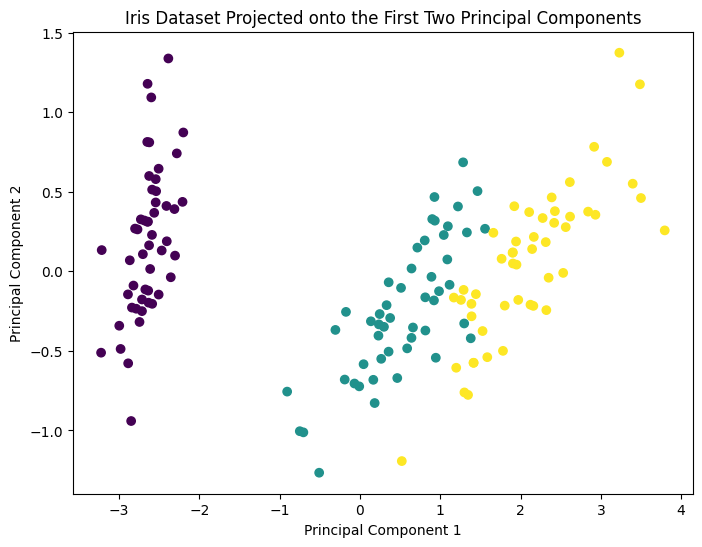

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Create a PCA instance
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the data in the new 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.title('Iris Dataset Projected onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Lasso, Ridge

# Assume sample dataset
data = pd.DataFrame({
    'numerical_feature_1': np.random.rand(100),
    'numerical_feature_2': np.random.rand(100),
    'categorical_feature_1': np.random.choice(['A', 'B', 'C'], size=100),
    'categorical_feature_2': np.random.choice(['X', 'Y', 'Z'], size=100),
    'target': np.random.choice([0, 1], size=100)
})

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']
# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Now, you can proceed with applying the feature selection or modeling techniques

# Mutual Information
mi_scores = mutual_info_classif(X_encoded, y)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_encoded, y)
lasso_coefs = lasso.coef_

# Ridge Regression
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_encoded, y)
ridge_coefs = ridge.coef_

# Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_encoded)

# Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_encoded)

# Print results
print("Mutual Information Scores:", mi_scores)
print("Lasso Regression Coefficients:", lasso_coefs)
print("Ridge Regression Coefficients:", ridge_coefs)
print("Factor Analysis Components:", fa.components_)
print("Singular Vectors (SVD):", svd.components_)


Mutual Information Scores: [0 0 0 0 0 0 0 0]
Lasso Regression Coefficients: [-0. -0.  0. -0.  0. -0.  0.  0.]
Ridge Regression Coefficients: [-0.0093465  -0.01325616  0.01395544 -0.0511041   0.03714865 -0.16681614
  0.13115088  0.03566526]
Factor Analysis Components: [[-3.08493239e-03  5.99739894e-03  4.85071249e-02 -4.85071250e-02
   2.77740278e-14 -8.36655437e-13 -4.12310563e-01  4.12310563e-01]
 [-9.03265042e-03 -4.38353606e-04 -4.54471251e-02  6.60269553e-02
  -2.05798302e-02  4.66476152e-01 -2.33238076e-01 -2.33238076e-01]]
Singular Vectors (SVD): [[ 0.52199414  0.43991078  0.386874    0.26790006  0.22813716  0.27350669
   0.30159784  0.30780669]
 [-0.05219709 -0.04701684  0.5650108  -0.52249024 -0.10667595 -0.35702633
  -0.18605316  0.4789241 ]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import FactorAnalysis, TruncatedSVD
from sklearn.preprocessing import LabelEncoder

# Generate a synthetic dataset with 15 features (10 numerical, 5 categorical)
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_repeated=0, n_classes=2, random_state=42)
X = pd.DataFrame(X, columns=[f'num_feat_{i}' for i in range(10)] + [f'cat_feat_{i}' for i in range(5)])

# Convert categorical features to strings
for col in X.columns[-5:]:
    X[col] = X[col].astype('category').cat.codes.astype('str')

# Split the dataset into numerical and categorical features
num_cols = X.columns[:10]
cat_cols = X.columns[10:]

# Mutual Information
mutual_info = mutual_info_classif(X[num_cols], y)
mutual_info_scores = pd.Series(mutual_info, index=num_cols)
print("Mutual Information Scores:")
print(mutual_info_scores.sort_values(ascending=False))
"""
What: Mutual Information is a measure of the mutual dependence between two variables.
Why: To identify relevant features by quantifying the amount of information each feature provides about the target variable.
Where: Commonly used as a feature selection method in machine learning.
When: During the feature selection and model building phase of the data science life cycle.
How: Use the mutual_info_classif function from scikit-learn to calculate the Mutual Information scores for numerical features.
Other: Mutual Information can handle both continuous and categorical features effectively and is less biased towards features with more distinct values compared to Information Gain.
"""

# Lasso (Least Absolute Shrinkage and Selection Operator)
lasso = Lasso(alpha=0.1)
lasso.fit(X[num_cols], y)
lasso_coef = lasso.coef_
selected_features = num_cols[lasso_coef != 0]
print("\nLasso Selected Features:")
print(selected_features)
"""
What: Lasso is a linear regression method that applies L1 regularization, which can drive some coefficients to exactly zero, effectively performing feature selection.
Why: To select the most relevant features while building a sparse linear model that can be easily interpreted.
Where: Commonly used for both feature selection and model building, especially in regression tasks.
When: During the model training and feature selection phase of the data science life cycle.
How: Fit a Lasso model on the numerical features and target variable, and identify the selected features based on non-zero coefficients.
Other: The alpha parameter controls the regularization strength and can be tuned using techniques like cross-validation.
"""

# Ridge Regression
ridge = Ridge(alpha=0.5)
ridge.fit(X[num_cols], y)
ridge_coef = ridge.coef_
print("\nRidge Regression Coefficients:")
print(pd.Series(ridge_coef, index=num_cols))
"""
What: Ridge Regression is a linear regression method that applies L2 regularization, which shrinks the coefficients towards zero but does not set them exactly to zero.
Why: To reduce the impact of multicollinearity and improve the model's generalization performance.
Where: Commonly used in regression tasks, especially when dealing with multicollinear features.
When: During the model training phase of the data science life cycle.
How: Fit a Ridge Regression model on the numerical features and target variable, and examine the estimated coefficients.
Other: Ridge Regression does not perform explicit feature selection but can be used in conjunction with other feature selection methods.
"""

# Factor Analysis
fa = FactorAnalysis(n_components=5)
fa.fit(X[num_cols])
loadings = fa.components_.T
print("\nFactor Analysis Loadings:")
print(pd.DataFrame(loadings, index=num_cols))
"""
What: Factor Analysis is a dimensionality reduction technique that aims to identify underlying latent factors (or components) that explain the variance in the observed variables.
Why: To reduce the dimensionality of the data by identifying the most important latent factors, which can be used for feature selection or data transformation.
Where: Commonly used in exploratory data analysis, feature selection, and data preprocessing.
When: During the data exploration and preprocessing phase of the data science life cycle.
How: Create an instance of FactorAnalysis and fit it to the numerical features, then examine the loadings (factor weights) to identify the most important features.
Other: Factor Analysis assumes that the observed variables are linearly related to the latent factors and can be sensitive to deviations from normality.
"""

# Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=5)
svd.fit(X[num_cols])
loadings = svd.components_.T
print("\nSVD Loadings:")
print(pd.DataFrame(loadings, index=num_cols))
"""
What: Singular Value Decomposition (SVD) is a matrix factorization technique that can be used for dimensionality reduction and feature selection.
Why: To identify the most important principal components (or singular vectors) that capture the maximum variance in the data.
Where: Commonly used in dimensionality reduction, feature selection, and recommender systems.
When: During the data exploration and preprocessing phase of the data science life cycle.
How: Create an instance of TruncatedSVD and fit it to the numerical features, then examine the loadings (singular vectors) to identify the most important features.
Other: SVD is a powerful technique that can handle both sparse and dense data, and it is often used as an alternative to Principal Component Analysis (PCA) for large datasets.
"""

Mutual Information Scores:
num_feat_5    0.098738
num_feat_2    0.062133
num_feat_4    0.047810
num_feat_0    0.047133
num_feat_3    0.046416
num_feat_8    0.045282
num_feat_7    0.026287
num_feat_6    0.001789
num_feat_1    0.000000
num_feat_9    0.000000
dtype: float64

Lasso Selected Features:
Index(['num_feat_2', 'num_feat_3', 'num_feat_4', 'num_feat_5', 'num_feat_7',
       'num_feat_8'],
      dtype='object')

Ridge Regression Coefficients:
num_feat_0    0.007444
num_feat_1    0.002941
num_feat_2    0.099155
num_feat_3    0.011393
num_feat_4    0.046666
num_feat_5   -0.104190
num_feat_6   -0.000945
num_feat_7   -0.028173
num_feat_8   -0.028555
num_feat_9    0.001490
dtype: float64

Factor Analysis Loadings:
                   0         1         2         3         4
num_feat_0  3.559781 -0.451745  0.077991  0.063453 -0.131867
num_feat_1 -0.179520 -0.174593 -0.335777 -0.452748  0.519430
num_feat_2  0.147396  1.178875  1.461336  0.007375 -0.123544
num_feat_3  0.583629 -0.617179  0

'\nWhat: Singular Value Decomposition (SVD) is a matrix factorization technique that can be used for dimensionality reduction and feature selection.\nWhy: To identify the most important principal components (or singular vectors) that capture the maximum variance in the data.\nWhere: Commonly used in dimensionality reduction, feature selection, and recommender systems.\nWhen: During the data exploration and preprocessing phase of the data science life cycle.\nHow: Create an instance of TruncatedSVD and fit it to the numerical features, then examine the loadings (singular vectors) to identify the most important features.\nOther: SVD is a powerful technique that can handle both sparse and dense data, and it is often used as an alternative to Principal Component Analysis (PCA) for large datasets.\n'